In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
x = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [14]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
print("asccuracy-score:",accuracy)

asccuracy-score: 0.85


<Axes: >

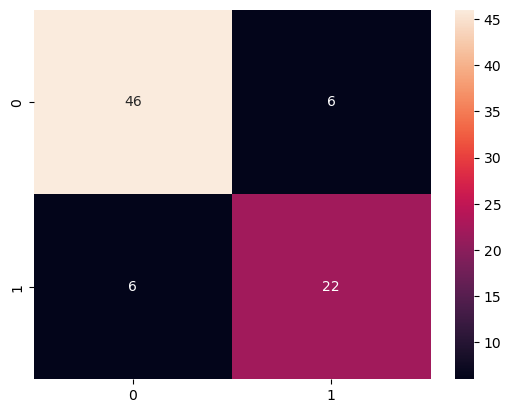

In [15]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

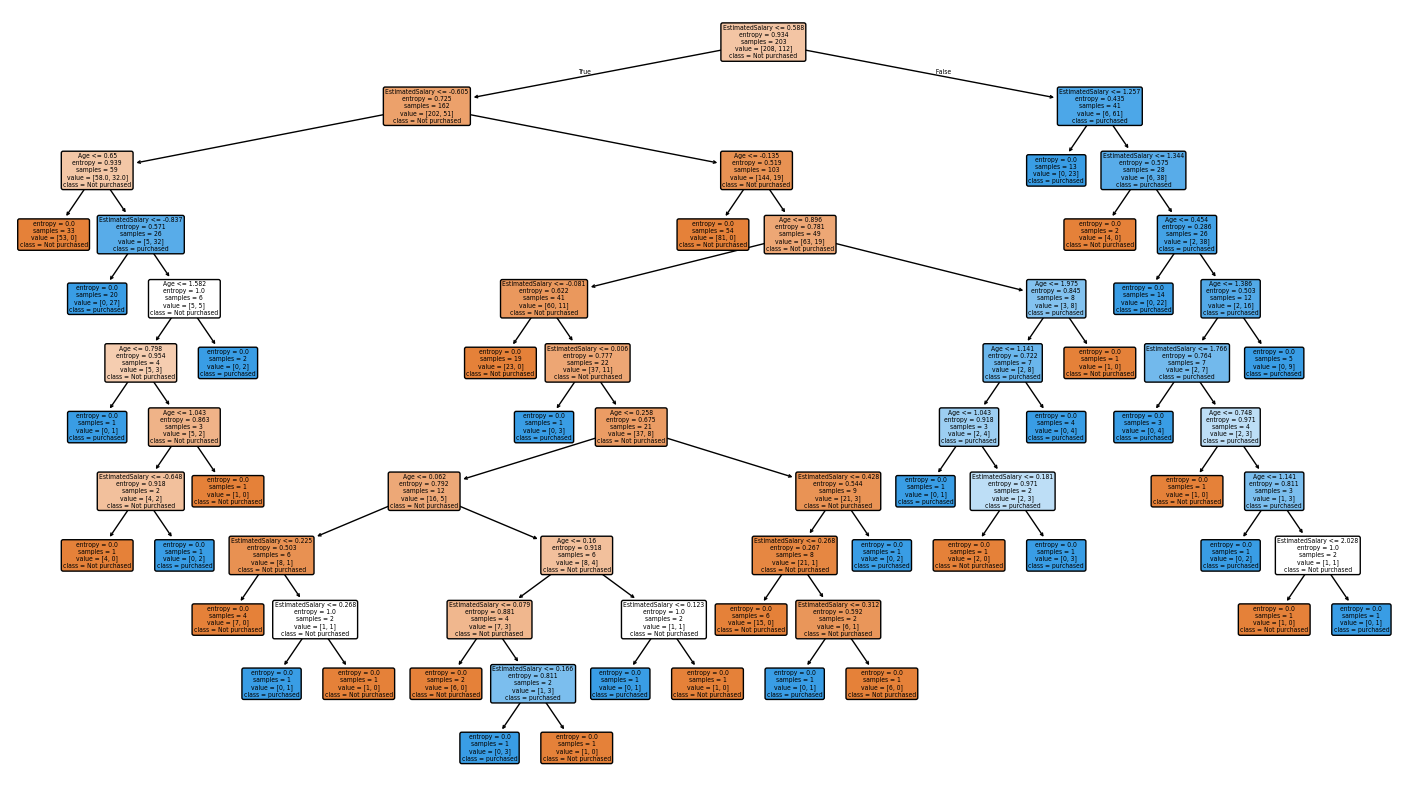

In [18]:
from sklearn.tree import plot_tree
st = classifier.estimators_[0]
plt.figure(figsize=(18,10))
plot_tree(
    st,
    feature_names=["Age","EstimatedSalary"],
    class_names=["Not purchased","purchased"],
    filled=True,
    rounded=True
)
plt.show()

In [80]:
df = pd.read_csv("creditcard.csv")

In [66]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [39]:
num_cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [35]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [36]:
df = df[~((df[num_cols] < lower) | (df[num_cols] > upper)).any(axis=1)]


In [81]:
x = df.iloc[:,0:30].values
y = df.iloc[:,-1].values

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [49]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy-score:",accuracy)

accuracy-score: 1.0


C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

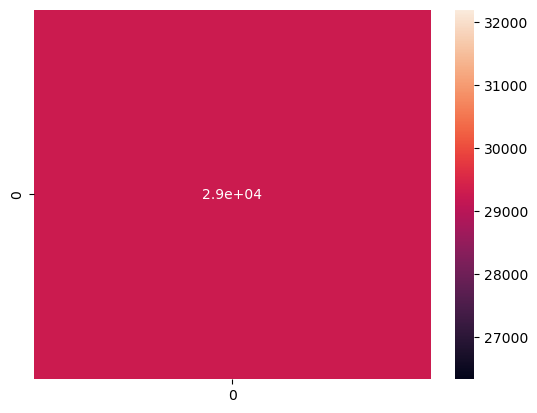

In [50]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [51]:
cm

array([[29264]], dtype=int64)

#Decision tree#

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion= "entropy"
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy-score:",accuracy)

accuracy-score: 1.0


C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

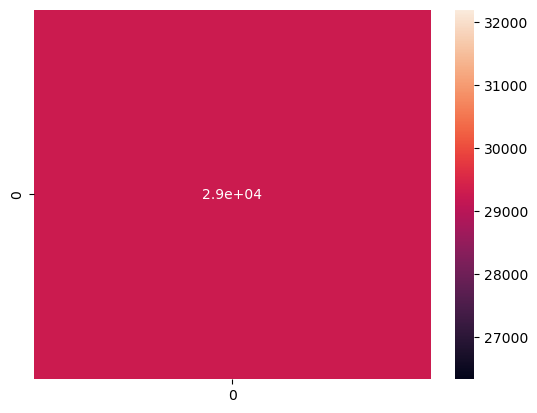

In [59]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [60]:
cm

array([[29264]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29264

    accuracy                           1.00     29264
   macro avg       1.00      1.00      1.00     29264
weighted avg       1.00      1.00      1.00     29264



In [64]:
print(y_test.value_counts())
print(y_pred.value_counts())


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'